In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/tabular-playground-series-nov-2021/sample_submission.csv
/kaggle/input/tabular-playground-series-nov-2021/train.csv
/kaggle/input/tabular-playground-series-nov-2021/test.csv


In [2]:
# Load packages
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree

In [3]:
# Load training data
df = pd.read_csv("../input/tabular-playground-series-nov-2021/train.csv") 
# check for missing values
#df.isnull().sum()
df.head()

,id,f0,f1,f2,f3,f4,f5,f6,f7,f8,...,f91,f92,f93,f94,f95,f96,f97,f98,f99,target
0,0,0.106643,3.59437,132.8040,3.18428,0.081971,1.18859,3.73238,2.266270,2.09959,...,1.09862,0.013331,-0.011715,0.052759,0.065400,4.211250,1.97877,0.085974,0.240496,0
1,1,0.125021,1.67336,76.5336,3.37825,0.099400,5.09366,1.27562,-0.471318,4.54594,...,3.46017,0.017054,0.124863,0.154064,0.606848,-0.267928,2.57786,-0.020877,0.024719,0
2,2,0.036330,1.49747,233.5460,2.19435,0.026914,3.12694,5.05687,3.849460,1.80187,...,4.88300,0.085222,0.032396,0.116092,-0.001688,-0.520069,2.14112,0.124464,0.148209,0
3,3,-0.014077,0.24600,779.9670,1.89064,0.006948,1.53112,2.69800,4.517330,4.50332,...,3.47439,-0.017103,-0.008100,0.062013,0.041193,0.511657,1.96860,0.040017,0.044873,0
4,4,-0.003259,3.71542,156.1280,2.14772,0.018284,2.09859,4.15492,-0.038236,3.37145,...,1.91059,-0.042943,0.105616,0.125072,0.037509,1.043790,1.07481,-0.012819,0.072798,1


In [4]:
#from sklearn.preprocessing import StandardScaler
#scaler = StandardScaler()

#scaler.transform(df)

#print(scaler.transform([[2, 2]]))
#scaled_df = pd.DataFrame(df)

#scaled_df = scaler.fit_transform(df)

#scaled_df.head()

In [5]:
# Split the data into X and y
output_col = ['target']
X = df.drop(['id', 'target'], axis=1)
y = df[output_col]
#X.head()

[ 0. -0. -0. -0.  0. -0.  0.  0.  0. -0.  0.  0.  0.  0. -0. -0. -0. -0.
  0.  0.  0. -0. -0. -0.  0. -0. -0.  0.  0.  0.  0. -0.  0.  0.  0.  0.
 -0. -0. -0. -0.  0.  0.  0.  0.  0.  0.  0. -0. -0. -0.  0.  0.  0. -0.
 -0. -0.  0.  0.  0. -0.  0.  0. -0. -0. -0. -0. -0. -0.  0.  0.  0. -0.
 -0.  0.  0. -0. -0.  0. -0.  0. -0.  0. -0. -0. -0.  0. -0. -0.  0.  0.
 -0. -0. -0. -0. -0.  0.  0. -0.  0. -0.]


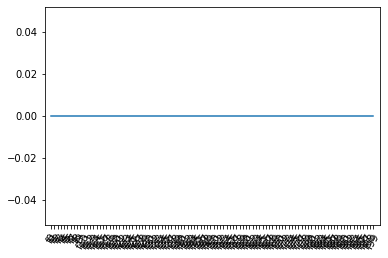

In [6]:
# Lasso (L1) Regression: Plot is flat 
from sklearn.linear_model import Lasso

df_columns = X.columns

# Instantiate a lasso regressor: lasso
lasso = Lasso(alpha=0.4, normalize=True)

# Fit the regressor to the data
lasso.fit(X,y)

# Compute and print the coefficients
lasso_coef = lasso.fit(X,y).coef_
print(lasso_coef)

# Plot the coefficients
plt.plot(range(len(df_columns)), lasso_coef)
plt.xticks(range(len(df_columns)), df_columns.values, rotation=60)
plt.margins(0.02)
plt.show()

In [7]:
# Split the data into training and test data
X_train, X_test, y_train, y_test =  train_test_split(X,y,test_size = 0.30, random_state= 44)

# Choose the criterion and max depth of the tree you want to use
CRITERION = 'gini'
MAX_DEPTH = 3

# Set up the DT classifier
dt_clf = DecisionTreeClassifier(criterion=CRITERION, max_depth=MAX_DEPTH, random_state=43)

# Train the DT classifier
dt_clf.fit(X_train, y_train)

# Evaluate the DT on the test set
y_pred = dt_clf.predict(X_test)
print(f'Model accuracy score with criterion {CRITERION} index: {accuracy_score(y_test, y_pred):.4f}')

Model accuracy score with criterion gini index: 0.5754


In [8]:
import xgboost as xgb # XGBoost typically uses the alias "xgb"

# Instatiate a XGBClassifier 
xgb_clf = xgb.XGBClassifier(n_estimators= 12, random_state=43, eval_metric='mlogloss')

# Inspect the parameters
#xgb_clf.get_params()

# make predictions for test data
xgb_clf.fit(X_train, y_train)

# Evaluate the DT on the test set
y_pred_xg = xgb_clf.predict(X_test)

# evaluate predictions
accuracy = accuracy_score(y_test, y_pred_xg)
print("Accuracy: %.2f%%" % (accuracy * 100))
# print("Baseline accuracy:", accuracy)

/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Accuracy: 65.57%


<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

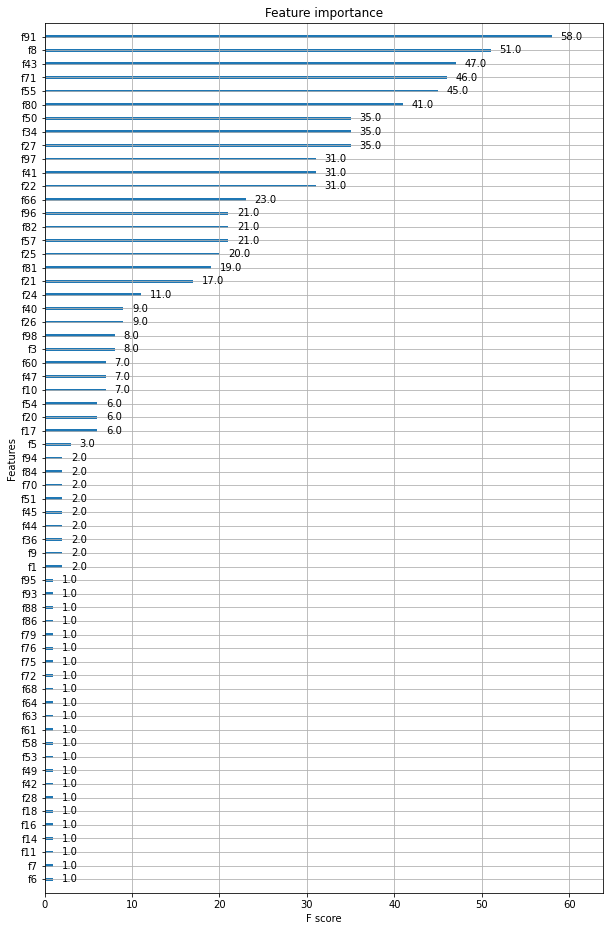

In [9]:
# Checking feature importance
import matplotlib
matplotlib.rcParams['figure.figsize'] = (10.0, 16)

# Plot feature importance
xgb.plot_importance(xgb_clf)

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

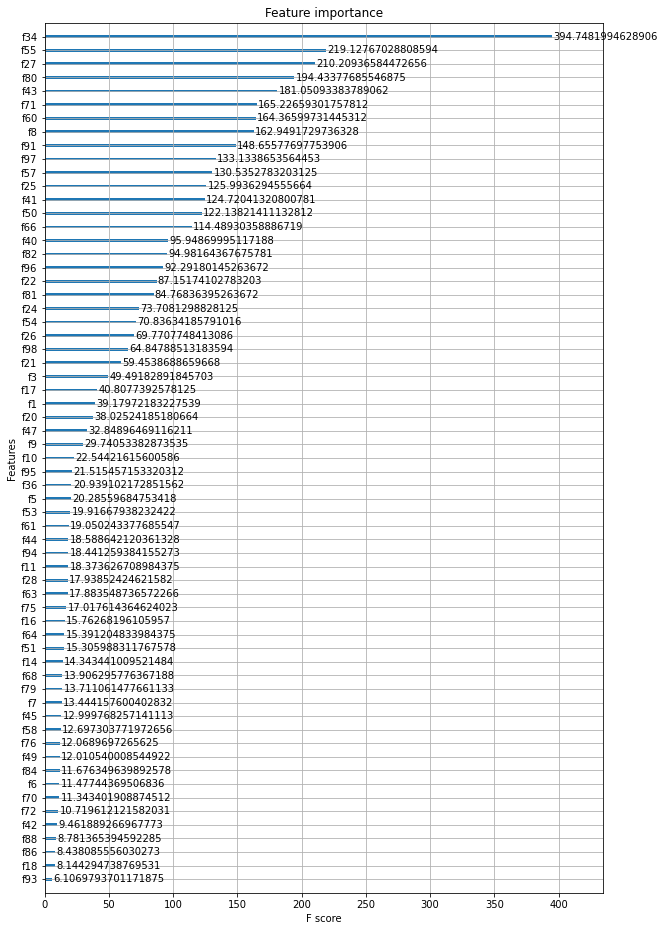

In [10]:
# Plot gain instead of weight
xgb.plot_importance(xgb_clf, importance_type="gain")

In [11]:
# RandomSearch CV

#from sklearn.model_selection import RandomizedSearchCV

# Define a parameter grid
#rs_param_grid = {
    # max_depth: values from 3 to 12
#    'max_depth': list((range(3,12))),
    # alpha: values 0, .001, .01, .1
#    'alpha': [0,0.001, 0.01,0.1,1],
    # subsample: values 0.25,0.5,0.75, 1
#    'subsample': [0.5,0.75,1],
    # learning rate: ten values between 0.01 - 0.5
#    'learning_rate': np.linspace(0.01,0.5, 10),
    # n_estimators: values 10, 25, 40
#    'n_estimators': [10, 25, 40]
#    }


# Insantiate XGBoost Clasifier 
#xgb_clf_rs = xgb.XGBClassifier(eval_metric='mlogloss', random_state=43)

# Instantiate RandomizedSearchCV()
#xgb_rs = RandomizedSearchCV(estimator=xgb_clf_rs,param_distributions=rs_param_grid, 
#                                cv=3, n_iter=5, verbose=2, random_state=43)

# Train the model on the training set
#xgb_rs.fit(X_train, y_train)

# Print the best parameters and highest accuracy
#print("Best parameters found: ", xgb_rs.best_params_)
#print("Best accuracy found: ", xgb_rs.best_score_)

In [12]:
#instantiate final model
final_xgb_clf = xgb.XGBClassifier(eval_metric='mlogloss', random_state=43, 
                               subsample= 1, n_estimators= 40, max_depth= 6,
                               learning_rate= 0.44555555555555554, alpha= 0.01)
# make predictions for test data
final_xgb_clf.fit(X_train, y_train)

# Evaluate the DT on the test set
y_pred_xg_final = final_xgb_clf.predict(X_test)

# evaluate predictions
accuracy = accuracy_score(y_test, y_pred_xg_final)
print("Accuracy: %.2f%%" % (accuracy * 100))

Accuracy: 67.88%


In [13]:
# Load test data
test_df = pd.read_csv("../input/tabular-playground-series-nov-2021/test.csv") 
test_df.head()

,id,f0,f1,f2,f3,f4,f5,f6,f7,f8,...,f90,f91,f92,f93,f94,f95,f96,f97,f98,f99
0,600000,0.003229,4.838660,585.529,2.282910,0.713180,3.907830,0.480696,1.482270,4.891810,...,0.112910,1.073550,0.122149,0.086330,0.036010,0.010619,0.290343,1.898200,0.131533,0.012047
1,600001,0.008602,0.505536,-100.099,3.012670,0.027199,1.194610,5.036620,2.517440,4.553890,...,-0.020214,2.622340,0.123307,0.033063,0.123059,0.005771,-0.392923,3.689640,0.047418,0.120015
2,600002,1.461000,2.437260,-112.964,3.541230,0.752338,4.338310,1.648080,4.699910,1.950250,...,-0.011036,2.030180,-0.000426,0.084091,0.123605,0.499554,4.054650,3.330670,0.108843,0.064687
3,600003,0.140556,3.085610,179.451,0.573945,0.057342,2.216790,1.623480,0.526174,1.542540,...,0.050117,0.221613,0.045298,0.129966,0.004015,0.018279,2.696580,-0.533491,0.052524,0.011058
4,600004,0.128876,5.199760,107.466,-0.497149,0.080220,0.458121,0.629839,5.240460,-0.232279,...,0.058860,2.660430,0.135425,0.036481,0.093912,0.056315,1.110710,3.584470,0.145319,-0.050393


In [14]:
# Split the data into X and y
final_X = test_df.drop(['id'], axis=1)
# y = test_df.assign(target = y_pred_test)
#final_X.head()

In [15]:
# Evaluate the DT on the test set
final_y_pred = final_xgb_clf.predict(final_X)

output = pd.DataFrame({'id': test_df.id, 'target': final_y_pred})
output.to_csv('./submission.csv', index=False)
print("Your submission was successfully saved!")
output.info

Your submission was successfully saved!


<bound method DataFrame.info of              id  target
0        600000       1
1        600001       1
2        600002       1
3        600003       1
4        600004       1
...         ...     ...
539995  1139995       1
539996  1139996       1
539997  1139997       1
539998  1139998       1
539999  1139999       1

[540000 rows x 2 columns]>

In [16]:
# review sample submission data to check before submission
# Load data
#df = pd.read_csv("../input/tabular-playground-series-nov-2021/sample_submission.csv") 
#df.head()